In [79]:
%load_ext autoreload
import os,sys
import pandas as pd
import seaborn as sns
import numpy as np
sys.path.append("../")

print(sys.path)

%autoreload 2
from src.pySRM.pysrm.segment import IMZMLExtract, SpectraRegion



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
['/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '', '/home/mjoppich/.local/lib/python3.6/site-packages', '/home/mjoppich/.local/lib/python3.6/site-packages/mpld3-0.3.1.dev1-py3.6.egg', '/home/mjoppich/.local/lib/python3.6/site-packages/opennre-0.1-py3.6.egg', '/usr/local/lib/python3.6/dist-packages', '/usr/local/lib/python3.6/dist-packages/tf_unet-0.1.1-py3.6.egg', '/mnt/d/PythonCGI/jupyter_micropython_kernel', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/home/mjoppich/.ipython', '../', '../', '../']


[autoreload of src.pySRM.pysrm.segment failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "../src/pySRM/pysrm/segment.py", line 103
    def mass_heatmap(self, mas

In [80]:
imze = IMZMLExtract("/mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML")
spectra = imze.get_region_array(0)
imze.normalize_region_array(spectra, normalize="max_intensity_region")


Opening regions file for /mnt/d/dev/data/msi/slideD/181114_AT1_Slide_D_Proteins.imzML
(45, 59, 17900)


In [81]:
print("Got spectra", spectra.shape)

Got spectra (45, 59, 17900)


In [18]:
sum(spectra[0,0])

94.93629248736084

In [92]:
spec = SpectraRegion(spectra, imze.mzValues)

In [93]:
spec.calculate_similarity(mode="spectra_log_dist")

2020-06-05 11:58:42,453  SpectraRegion  INFO: Creating C++ obj
2020-06-05 11:58:42,453  SpectraRegion  INFO: Creating C++ obj
2020-06-05 11:58:42,453  SpectraRegion  INFO: Creating C++ obj
2020-06-05 11:58:42,457  SpectraRegion  INFO: dimensions 17900
2020-06-05 11:58:42,457  SpectraRegion  INFO: dimensions 17900
2020-06-05 11:58:42,457  SpectraRegion  INFO: dimensions 17900
2020-06-05 11:58:42,460  SpectraRegion  INFO: input dimensions (45, 59, 17900)
2020-06-05 11:58:42,460  SpectraRegion  INFO: input dimensions (45, 59, 17900)
2020-06-05 11:58:42,460  SpectraRegion  INFO: input dimensions (45, 59, 17900)
2020-06-05 11:58:42,465  SpectraRegion  INFO: Switching to dot mode
2020-06-05 11:58:42,465  SpectraRegion  INFO: Switching to dot mode
2020-06-05 11:58:42,465  SpectraRegion  INFO: Switching to dot mode
2020-06-05 11:58:42,469  SpectraRegion  INFO: Starting calc similarity c++
2020-06-05 11:58:42,469  SpectraRegion  INFO: Starting calc similarity c++
2020-06-05 11:58:42,469  Spectr

array([[0.94999999, 0.92799679, 0.92205312, ..., 0.84527737, 0.84791523,
        0.85876535],
       [0.92799679, 0.94999999, 0.93488077, ..., 0.89359014, 0.89607352,
        0.90569586],
       [0.92205312, 0.93488077, 0.94999999, ..., 0.90869918, 0.90700655,
        0.91964185],
       ...,
       [0.84527737, 0.89359014, 0.90869918, ..., 0.94999999, 0.91141728,
        0.91717233],
       [0.84791523, 0.89607352, 0.90700655, ..., 0.91141728, 0.94999999,
        0.9172074 ],
       [0.85876535, 0.90569586, 0.91964185, ..., 0.91717233, 0.9172074 ,
        0.94999999]])

In [94]:
res = spec.segment(method="WARD", number_of_regions=10)
res.shape

2020-06-05 12:05:00,969  SpectraRegion  INFO: Calculating clusters
2020-06-05 12:05:00,969  SpectraRegion  INFO: Calculating clusters
2020-06-05 12:05:00,969  SpectraRegion  INFO: Calculating clusters
2020-06-05 12:05:01,360  SpectraRegion  INFO: Calculating clusters done
2020-06-05 12:05:01,360  SpectraRegion  INFO: Calculating clusters done
2020-06-05 12:05:01,360  SpectraRegion  INFO: Calculating clusters done
2020-06-05 12:05:01,385  SpectraRegion  INFO: Calculating clusters saved
2020-06-05 12:05:01,385  SpectraRegion  INFO: Calculating clusters saved
2020-06-05 12:05:01,385  SpectraRegion  INFO: Calculating clusters saved


(45, 59)

In [95]:
spec.filter_clusters(method='remove_singleton')
spec.filter_clusters(method='merge_background')


2020-06-05 12:05:02,803  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 5}
2020-06-05 12:05:02,803  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 5}
2020-06-05 12:05:02,803  SpectraRegion  INFO: Assigning clusters to background: {1, 2, 3, 4, 5}


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int16)

In [96]:
import matplotlib.pyplot as plt

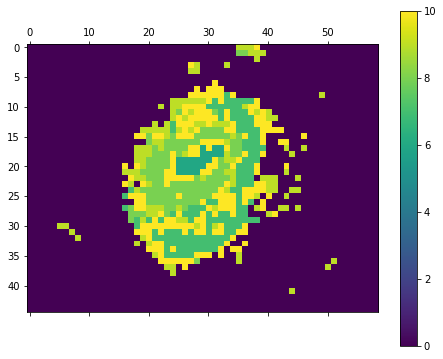

In [97]:
plt.rcParams["figure.figsize"] = (8,6)
spec.plot_segments()

In [98]:
spec.consensus_spectra()

2020-06-05 12:05:10,374  SpectraRegion  INFO: Calculating consensus spectra
2020-06-05 12:05:10,374  SpectraRegion  INFO: Calculating consensus spectra
2020-06-05 12:05:10,374  SpectraRegion  INFO: Calculating consensus spectra
2020-06-05 12:05:10,486  SpectraRegion  INFO: Calculating consensus spectra done
2020-06-05 12:05:10,486  SpectraRegion  INFO: Calculating consensus spectra done
2020-06-05 12:05:10,486  SpectraRegion  INFO: Calculating consensus spectra done


{0: array([0.00512467, 0.00512467, 0.00512467, ..., 0.00222092, 0.00222092,
        0.00222092]),
 9: array([0.00445184, 0.00445184, 0.00445184, ..., 0.00201824, 0.00201824,
        0.00201824]),
 10: array([0.00500629, 0.00500629, 0.00500629, ..., 0.00249978, 0.00249978,
        0.00249978]),
 8: array([0.00764575, 0.00764575, 0.00764575, ..., 0.00242446, 0.00242446,
        0.00242446]),
 7: array([0.00781499, 0.00781499, 0.00781499, ..., 0.00325962, 0.00325962,
        0.00325962]),
 6: array([0.00969619, 0.00969619, 0.00969619, ..., 0.00266749, 0.00266749,
        0.00266749])}

In [99]:
spec.consensus_similarity()

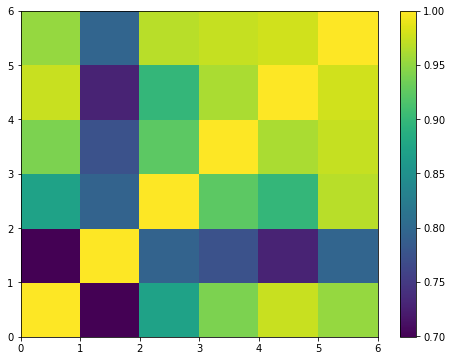

In [100]:
#plt.matshow(spec.consensus_similarity_matrix)
heatmap = plt.pcolor(spec.consensus_similarity_matrix)
plt.colorbar(heatmap)

In [15]:
sum(spec.consensus[1])

199.9031546046168

2020-06-04 23:47:37,808  SpectraRegion  INFO: Found clusterLabels [0, 6, 7, 8, 9, 10]
2020-06-04 23:47:37,810  SpectraRegion  INFO: Processing clusterLabel 0
2020-06-04 23:48:20,702  SpectraRegion  INFO: Processing clusterLabel 6
2020-06-04 23:48:20,708  SpectraRegion  INFO: Processing clusterLabel 7
2020-06-04 23:48:20,893  SpectraRegion  INFO: Processing clusterLabel 8
2020-06-04 23:48:21,027  SpectraRegion  INFO: Processing clusterLabel 9
2020-06-04 23:48:21,186  SpectraRegion  INFO: Processing clusterLabel 10


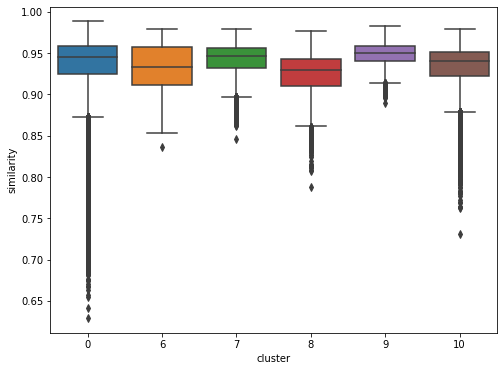

In [76]:
spec.plot_consensus_similarity(mode="spectra")

2020-06-04 23:48:23,449  SpectraRegion  INFO: Found clusterLabels [0, 6, 7, 8, 9, 10]
2020-06-04 23:48:23,450  SpectraRegion  INFO: Processing cluster 0


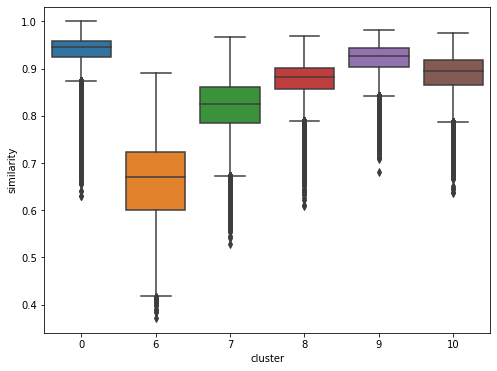

2020-06-04 23:50:15,235  SpectraRegion  INFO: Processing cluster 6


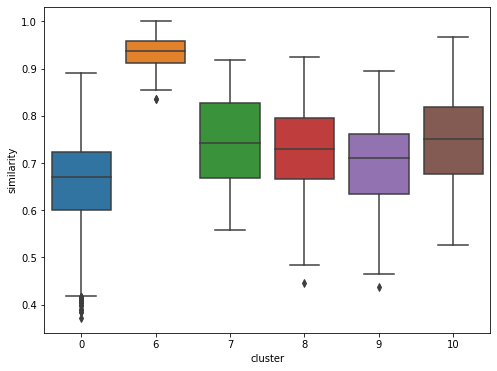

2020-06-04 23:50:16,990  SpectraRegion  INFO: Processing cluster 7


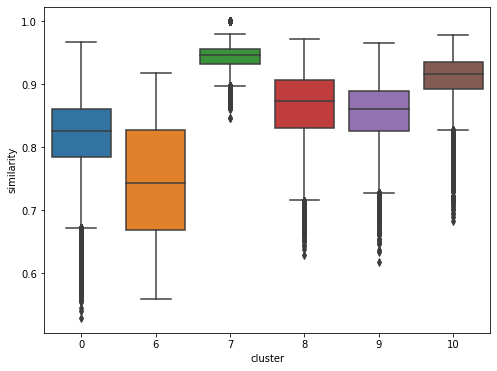

2020-06-04 23:50:25,094  SpectraRegion  INFO: Processing cluster 8


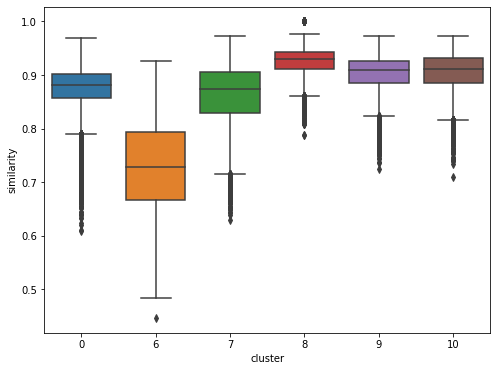

2020-06-04 23:50:31,614  SpectraRegion  INFO: Processing cluster 9


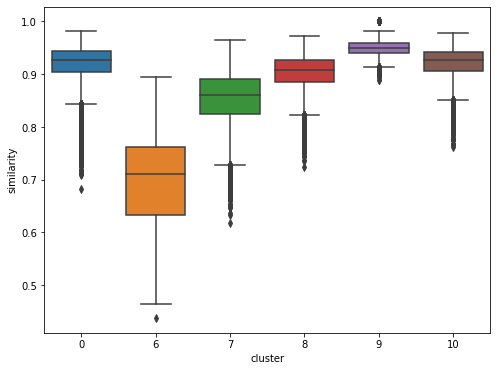

2020-06-04 23:50:38,867  SpectraRegion  INFO: Processing cluster 10


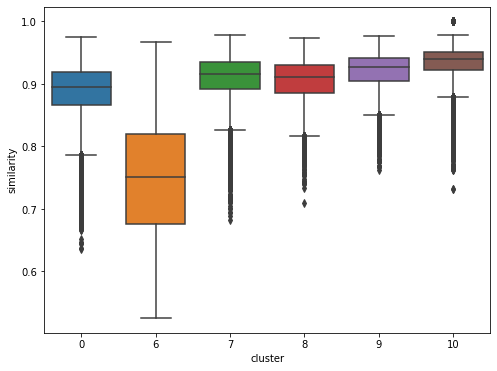

In [77]:
spec.plot_inter_consensus_similarity()

# Differential Analysis

2020-06-05 12:05:19,237  SpectraRegion  INFO: Processing Mass 12504 with best existing mass 12503.637158007228
2020-06-05 12:05:19,237  SpectraRegion  INFO: Processing Mass 12504 with best existing mass 12503.637158007228
2020-06-05 12:05:19,237  SpectraRegion  INFO: Processing Mass 12504 with best existing mass 12503.637158007228


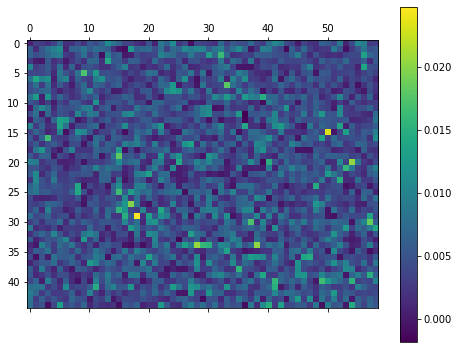

In [101]:
spec.mass_heatmap(12504)

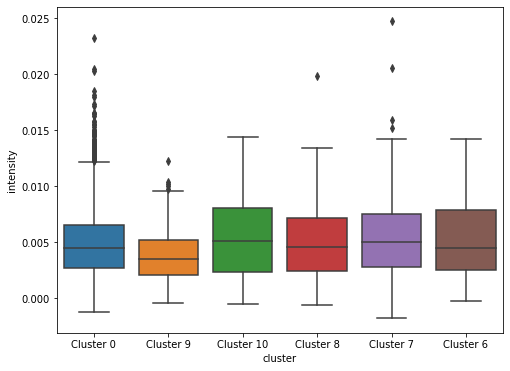

/usr/local/lib/python3.6/dist-packages/IPython/core/events.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


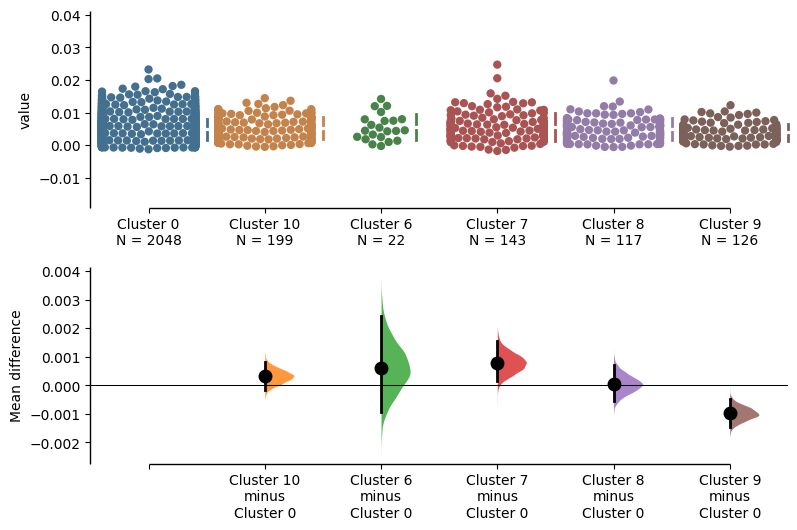

In [157]:
dfobj = spec.mass_dabest(12504)

In [108]:
import dabest

In [147]:
dfobj.head()

,mass,specidx,cluster,intensity
0,12504,0,Cluster 0,0.000661
1,12504,1,Cluster 0,0.003285
2,12504,2,Cluster 0,0.002679
3,12504,3,Cluster 0,0.001787
4,12504,4,Cluster 0,0.003672


In [148]:
dfobj_db = dfobj.pivot(index="specidx", columns='cluster', values='intensity')
dfobj_db.head()

cluster,Cluster 0,Cluster 10,Cluster 6,Cluster 7,Cluster 8,Cluster 9
specidx,,,,,,
0,0.000661,0.003742,0.007962,0.004112,0.010995,0.004485
1,0.003285,0.004725,0.006217,0.010870,0.006664,0.004603
2,0.002679,0.004356,0.002479,0.012901,0.007936,0.007219
3,0.001787,-0.000180,0.004555,0.008415,-0.000522,-0.000239
4,0.003672,0.002843,0.001812,0.003461,0.006163,0.002484


In [153]:
dbst = dabest.load(dfobj_db,idx=("Cluster 0","Cluster 6","Cluster 7","Cluster 8","Cluster 9","Cluster 10"), paired=False, resamples=200)

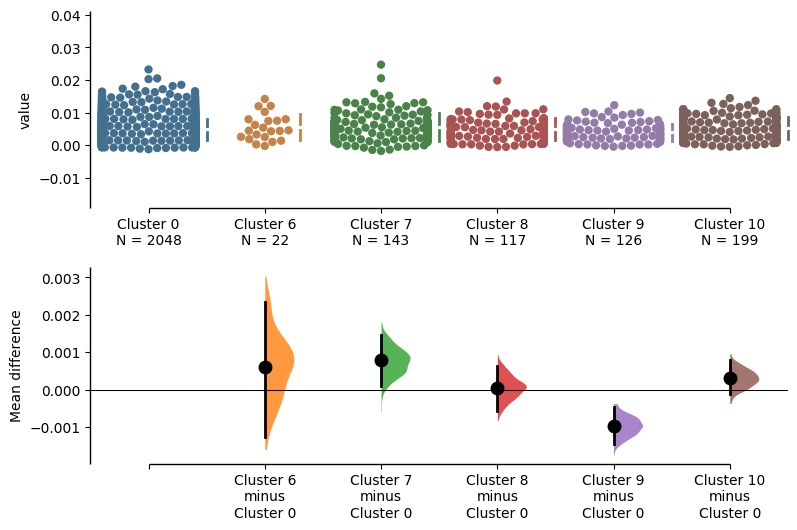

In [155]:
a=dbst.mean_diff.plot()

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
spec.vis_umap()